Updating data.

YahooFinance("BIL") has dubious total open-to-open returns for timestamps: DatetimeIndex(['2014-02-24 14:30:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


................
LARGEST SHARPE RATIO
gamma_trade and gamma_risk
(0.9, 10)
result

###########################################################
Universe size                                            18
Initial timestamp                       1994-02-01 14:30:00
Final timestamp                         2024-03-01 14:30:00
Number of periods                                       362
Initial value (USDOLLAR)                          1.000e+06
Final value (USDOLLAR)                            6.180e+06
Profit (USDOLLAR)                                 5.180e+06
                                                           
Avg. return (annualized)                               6.3%
Volatility (annualized)                                7.2%
Avg. excess return (annualized)                        3.9%
Avg. active return (annualized)                        3.9%
Excess volatility (annualized)                         7.1%
Active volatility (annualized)                         7.1%
                 

/Users/edkwang/.pyenv/versions/3.12.2/envs/rsch/lib/python3.12/site-packages/cvxportfolio/result.py:862: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show() # pragma: no cover
/Users/edkwang/.pyenv/versions/3.12.2/envs/rsch/lib/python3.12/site-packages/cvxportfolio/result.py:862: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show() # pragma: no cover


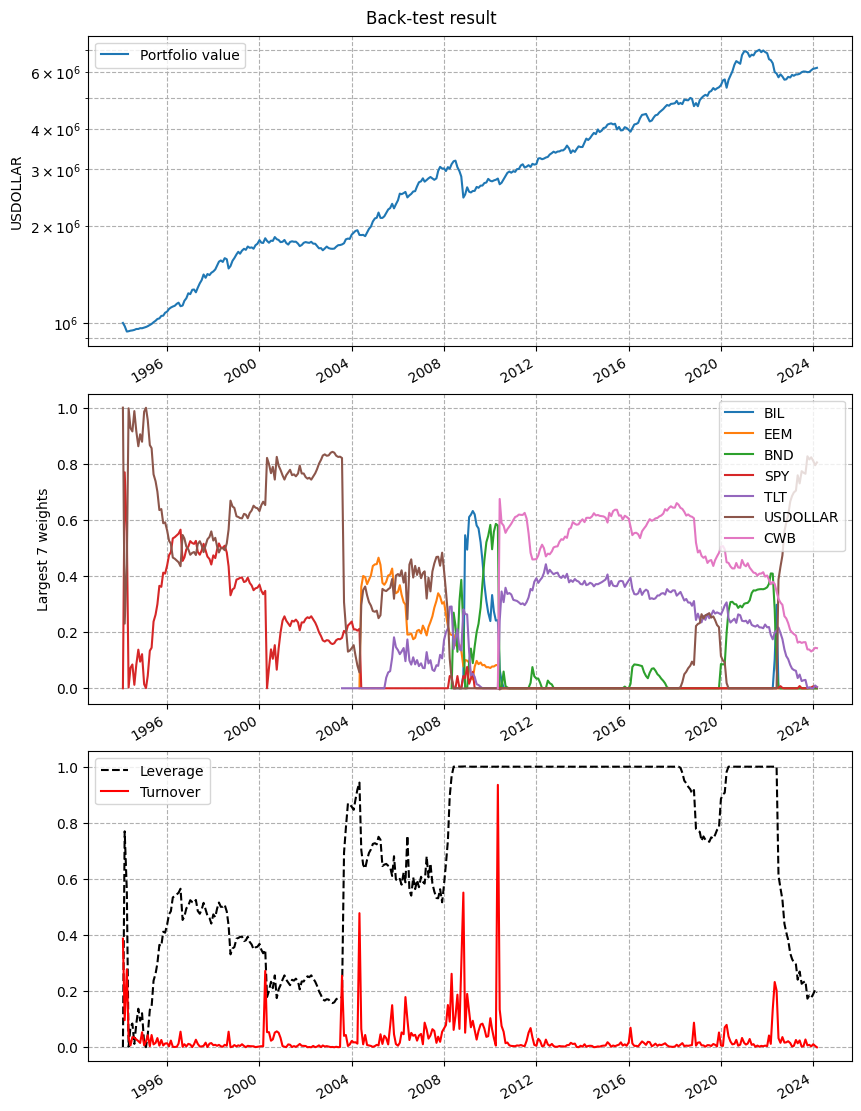

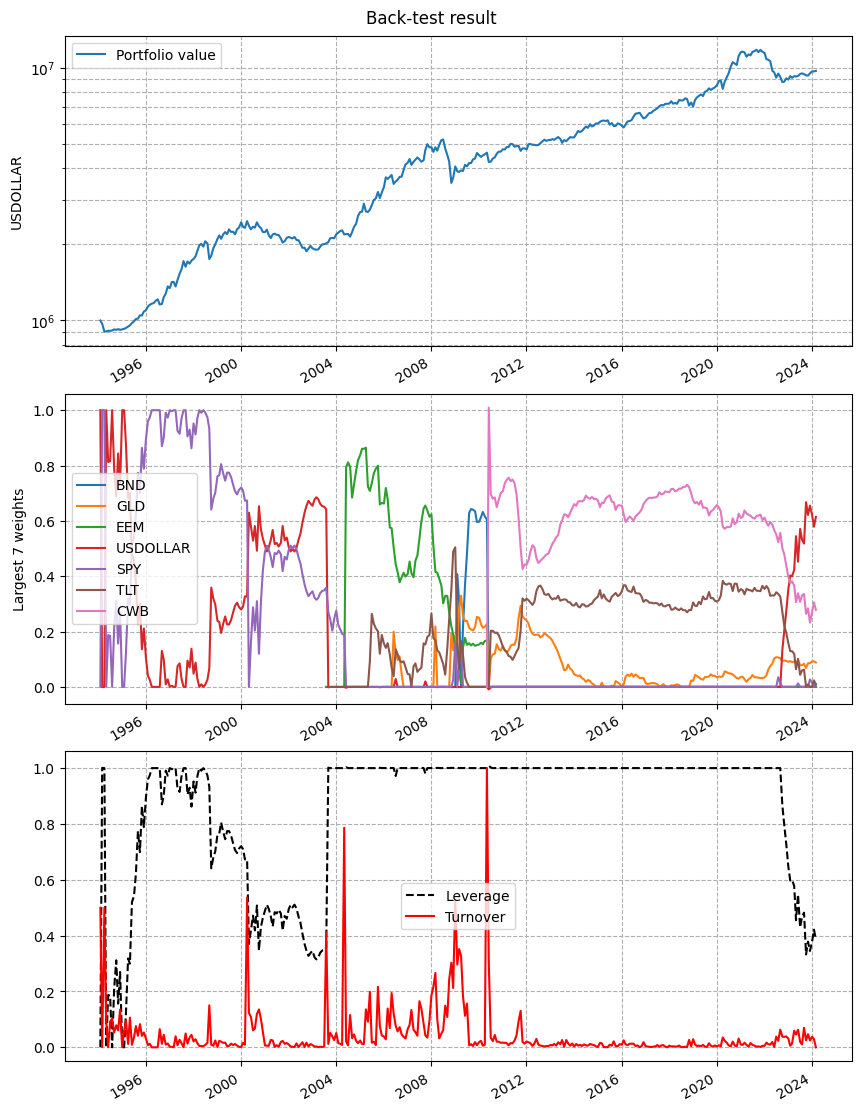

In [1]:
"""ETFs example covering the main asset classes.

This uses an explicit loop to create Multi Period Optimization
policies with a grid of values for the risk term multiplier
and the transaction cost term multiplier.

All result objects are collected, and then the one with
largest Sharpe ratio, and the one with largest growth rate,
are shown.
"""

import numpy as np

import cvxportfolio as cvx

# Uncomment the logging lines to get online information
# from the parallel backtest routines

# import logging
# logging.basicConfig(level=logging.INFO)
# log=logging.getLogger('=>')


UNIVERSE = [
    "QQQ", # nasdaq 100
    "SPY", # US large caps
    'EFA', # EAFE stocks
    "CWB", # convertible bonds
    "IWM", # US small caps
    "EEM", # EM stocks
    "GLD", # Gold
    'TLT', # long duration treasuries
    'HYG', # high yield bonds
    "EMB", # EM bonds (usd)
    'LQD', # investment grade bonds
    'PFF', # preferred stocks
    'VNQ', # US REITs
    'BND', # US total bond market
    'BIL', # US cash
    'TIP', # TIPS
    'DBC', # commodities
    ]


sim = cvx.StockMarketSimulator(UNIVERSE, trading_frequency='monthly')

def make_policy(gamma_trade, gamma_risk):
    return cvx.MultiPeriodOptimization(cvx.ReturnsForecast()
        - gamma_risk * cvx.FactorModelCovariance(num_factors=10)
        - gamma_trade * cvx.StocksTransactionCost(),
        [cvx.LongOnly(), cvx.LeverageLimit(1)],
        planning_horizon=6, solver='ECOS')

keys = [(gamma_trade, gamma_risk) for gamma_trade in np.array(range(10))/10 for gamma_risk in [.5, 1, 2, 5, 10]]
ress = sim.backtest_many([make_policy(*key) for key in keys], parallel=True)


print('LARGEST SHARPE RATIO')
idx = np.argmax([el.sharpe_ratio for el in ress])

print('gamma_trade and gamma_risk')
print(keys[idx])

print('result')
print(ress[idx])

ress[idx].plot()


print('LARGEST GROWTH RATE')
idx = np.argmax([el.growth_rates.mean() for el in ress])


print('gamma_trade and gamma_risk')
print(keys[idx])

print('result')
print(ress[idx])

ress[idx].plot()